# importing libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from pandas.plotting import scatter_matrix

In [2]:
data = pd.read_csv("house.csv")

# Perform EDA 

## Display the first few rows of the dataset

In [3]:
print(data.head())

           id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     lo

## Summary statistics of the dataset

In [4]:
print(data.describe())

                 id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.401822e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.673622e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517    

## Check for missing values

In [5]:
print(data.isnull().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


# Data Visualization 

## Histogram of 'price' 

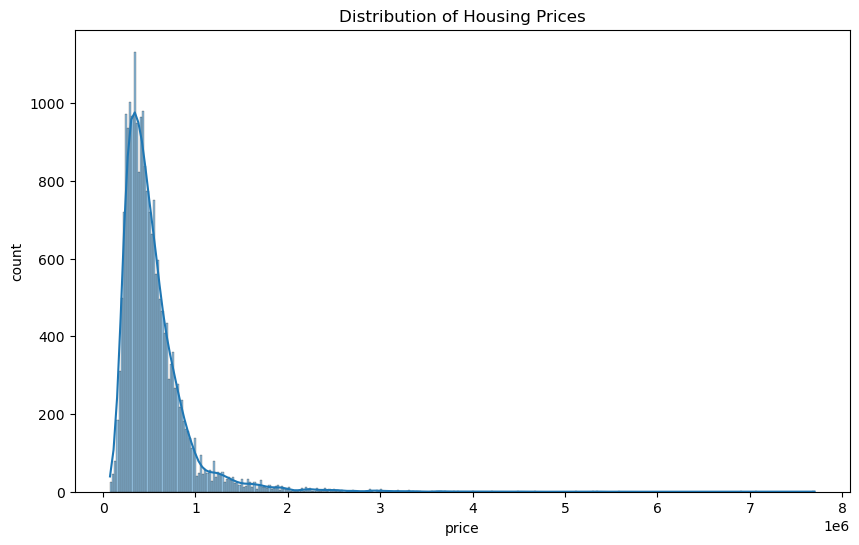

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='price', kde=True)
plt.xlabel('price')
plt.ylabel('count')
plt.title('Distribution of Housing Prices')
plt.show()

## Box plot of 'bedrooms' vs. 'price' 

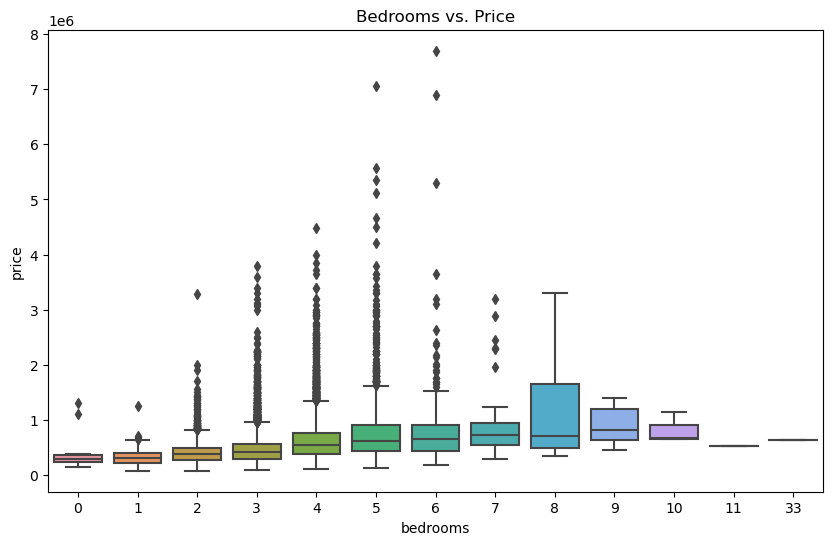

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='bedrooms', y='price')
plt.xlabel('bedrooms')
plt.ylabel('price')
plt.title('Bedrooms vs. Price')
plt.show()

## Scatter matrix plot 

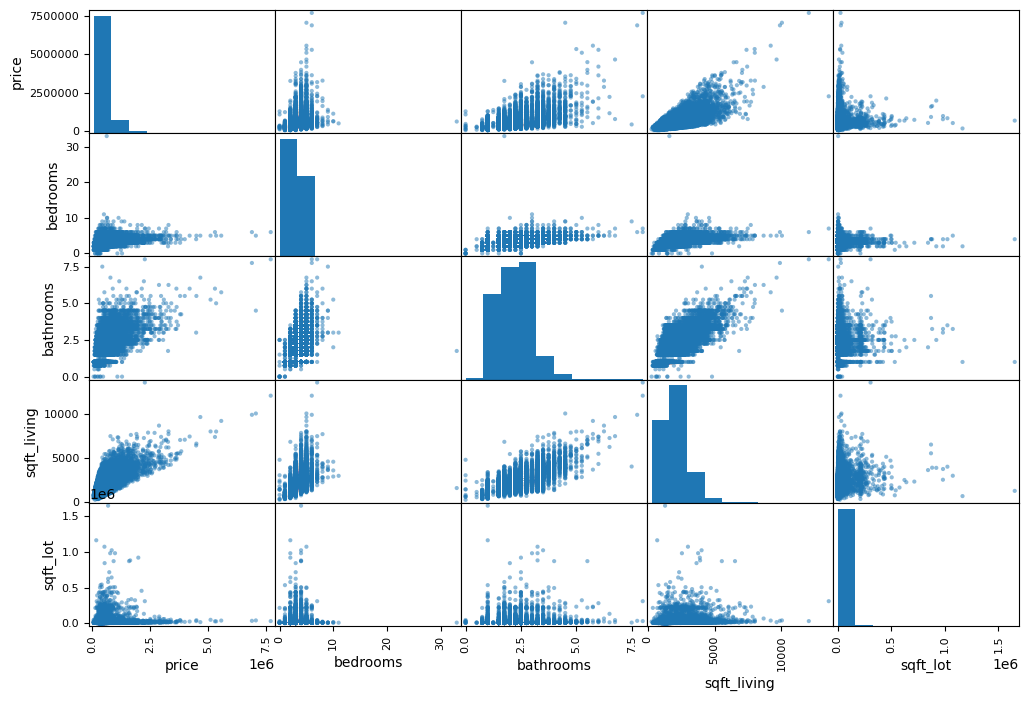

In [8]:
attributes = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']
scatter_matrix(data[attributes], figsize=(12, 8))
plt.show()

## Interactive scatter plot of 'sqft_living' vs. 'price' using Plotly

In [10]:
fig = px.scatter(data, x='sqft_living', y='price', trendline="ols")
fig.update_layout(title='Relationship between sqft_living and price', xaxis_title='sqft_living', yaxis_title='price')
fig.show()

# Model Building

## Prepare the data  

In [11]:
X = data[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']]
y = data['price']

##  Train the Random Forest Regression model with different estimators

In [12]:
estimators = [50, 100, 150, 200, 250]
train_scores = []
test_scores = []

## Split the data into training and testing sets 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
for estimator in estimators:
    model = RandomForestRegressor(n_estimators=estimator, random_state=42)
    model.fit(X_train, y_train)
    
    # Model evaluation
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Model accuracy evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
    print("Estimators:", estimator)
    print("Mean Squared Error:", mse)
    print("R-squared Score:", r2)
    print("----------------------")

Estimators: 50
Mean Squared Error: 75089609648.78271
R-squared Score: 0.5038832091372442
----------------------
Estimators: 100
Mean Squared Error: 75073990011.6963
R-squared Score: 0.5039864080253726
----------------------
Estimators: 150
Mean Squared Error: 73991150780.48213
R-squared Score: 0.5111407230753906
----------------------
Estimators: 200
Mean Squared Error: 73598369957.20828
R-squared Score: 0.513735824614292
----------------------
Estimators: 250
Mean Squared Error: 73751515483.60042
R-squared Score: 0.512723992651867
----------------------


# Accuracy plot 

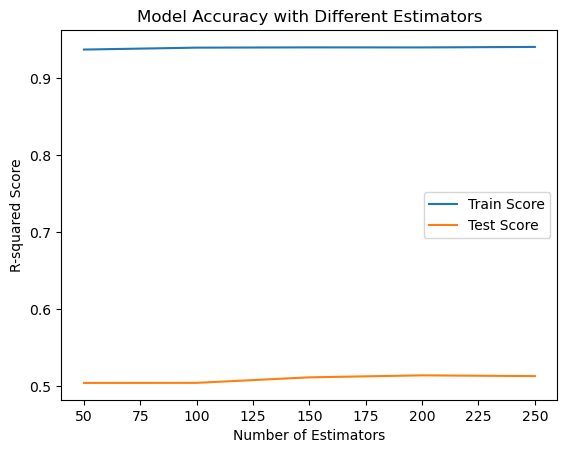

In [15]:
plt.plot(estimators, train_scores, label='Train Score')
plt.plot(estimators, test_scores, label='Test Score')
plt.xlabel('Number of Estimators')
plt.ylabel('R-squared Score')
plt.title('Model Accuracy with Different Estimators')
plt.legend()
plt.show()